In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [4]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_few_shots.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

01-ai/Yi-1.5-9B-Chat None False datasets/mac/mac.tsv results/mac-results_few_shots.csv False 300


In [6]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   chinese                                             1133 non-null   object
 1   english                                             1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/shots-00                    1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/shots-01                    1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/shots-03                    1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/shots-05                    1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/shots-10                    1133 non-null   object
 7   internlm/internlm2_5-7b-chat/shots-00               1133 non-null   object
 8   internlm/internlm2_5-7b-chat/shots-01               1133 non-null   object
 9   internlm

In [7]:
df_openai = pd.read_csv("results/mac-results_few_shots_openai.csv")
df_openai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   chinese               1133 non-null   object
 1   english               1133 non-null   object
 2   gpt-4o-mini/shots-00  1133 non-null   object
 3   gpt-4o-mini/shots-01  1133 non-null   object
 4   gpt-4o-mini/shots-03  1133 non-null   object
 5   gpt-4o-mini/shots-05  1133 non-null   object
 6   gpt-4o-mini/shots-10  1133 non-null   object
 7   gpt-4o-mini/shots-50  1133 non-null   object
 8   gpt-4o/shots-00       1133 non-null   object
 9   gpt-4o/shots-01       1133 non-null   object
 10  gpt-4o/shots-03       1133 non-null   object
 11  gpt-4o/shots-05       1133 non-null   object
 12  gpt-4o/shots-10       1133 non-null   object
 13  gpt-4o/shots-50       1133 non-null   object
dtypes: object(14)
memory usage: 124.1+ KB


In [8]:
openai_cols = df_openai.columns[2:].tolist()
openai_cols

['gpt-4o-mini/shots-00',
 'gpt-4o-mini/shots-01',
 'gpt-4o-mini/shots-03',
 'gpt-4o-mini/shots-05',
 'gpt-4o-mini/shots-10',
 'gpt-4o-mini/shots-50',
 'gpt-4o/shots-00',
 'gpt-4o/shots-01',
 'gpt-4o/shots-03',
 'gpt-4o/shots-05',
 'gpt-4o/shots-10',
 'gpt-4o/shots-50']

In [9]:
result_columns = df.columns[2:].to_list()
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/shots-00',
 'Qwen/Qwen2-72B-Instruct/shots-01',
 'Qwen/Qwen2-72B-Instruct/shots-03',
 'Qwen/Qwen2-72B-Instruct/shots-05',
 'Qwen/Qwen2-72B-Instruct/shots-10',
 'Qwen/Qwen2-72B-Instruct/shots-50',
 'Qwen/Qwen2-7B-Instruct/shots-00',
 'Qwen/Qwen2-7B-Instruct/shots-01',
 'Qwen/Qwen2-7B-Instruct/shots-03',
 'Qwen/Qwen2-7B-Instruct/shots-05',
 'Qwen/Qwen2-7B-Instruct/shots-10',
 'Qwen/Qwen2-7B-Instruct/shots-50',
 'internlm/internlm2_5-7b-chat/shots-00',
 'internlm/internlm2_5-7b-chat/shots-01',
 'internlm/internlm2_5-7b-chat/shots-03',
 'internlm/internlm2_5-7b-chat/shots-05',
 'internlm/internlm2_5-7b-chat/shots-10',
 'internlm/internlm2_5-7b-chat/shots-50',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-00',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-01',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-03',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-05',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-00',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/sho

In [10]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
df[openai_cols] = df_openai[openai_cols]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/shots-00',
  'Qwen/Qwen2-72B-Instruct/shots-01',
  'Qwen/Qwen2-72B-Instruct/shots-03',
  'Qwen/Qwen2-72B-Instruct/shots-05',
  'Qwen/Qwen2-72B-Instruct/shots-10',
  'Qwen/Qwen2-72B-Instruct/shots-50',
  'Qwen/Qwen2-7B-Instruct/shots-00',
  'Qwen/Qwen2-7B-Instruct/shots-01',
  'Qwen/Qwen2-7B-Instruct/shots-03',
  'Qwen/Qwen2-7B-Instruct/shots-05',
  'Qwen/Qwen2-7B-Instruct/shots-10',
  'Qwen/Qwen2-7B-Instruct/shots-50',
  'internlm/internlm2_5-7b-chat/shots-00',
  'internlm/internlm2_5-7b-chat/shots-01',
  'internlm/internlm2_5-7b-chat/shots-03',
  'internlm/internlm2_5-7b-chat/shots-05',
  'internlm/internlm2_5-7b-chat/shots-10',
  'internlm/internlm2_5-7b-chat/shots-50',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-00',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-01',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-03',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-05',
  'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-00',
  'shenzhi-wang/Mistral-

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 42 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   chinese                                             1133 non-null   object
 1   english                                             1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/shots-00                    1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/shots-01                    1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/shots-03                    1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/shots-05                    1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/shots-10                    1133 non-null   object
 7   Qwen/Qwen2-72B-Instruct/shots-50                    1133 non-null   object
 8   Qwen/Qwen2-7B-Instruct/shots-00                     1133 non-null   object
 9   Qwen/Qwe

In [12]:
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant="shots")
metrics_df["shots"] = metrics_df["shots"].apply(lambda x: int(x))
metrics_df

Qwen/Qwen2-72B-Instruct/shots-00: {'meteor': 0.4003638205699929, 'bleu_scores': {'bleu': 0.12223832517678616, 'precisions': [0.4121705826924831, 0.16076937606245673, 0.07965006202258929, 0.04230221679886109], 'brevity_penalty': 1.0, 'length_ratio': 1.0897316992381583, 'translation_length': 32899, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.44334373479298617, 'rouge2': 0.19605848038209603, 'rougeL': 0.3847629463750985, 'rougeLsum': 0.3848040611242751}, 'accuracy': 0.0, 'correct_ids': []}
Qwen/Qwen2-72B-Instruct/shots-01: {'meteor': 0.4068727655718769, 'bleu_scores': {'bleu': 0.13151008586303575, 'precisions': [0.4338771593090211, 0.17213794934776114, 0.08670460424211071, 0.04619028819581524], 'brevity_penalty': 1.0, 'length_ratio': 1.0354421994037761, 'translation_length': 31260, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4529877783203307, 'rouge2': 0.20363849363098002, 'rougeL': 0.3944115167988717, 'rougeLsum': 0.3944925046166603}, 'accuracy': 0.0017652250661

model  shots    meteor    bleu_1  \
0                     Qwen/Qwen2-72B-Instruct      0  0.400364  0.122238   
1                     Qwen/Qwen2-72B-Instruct      1  0.406873  0.131510   
2                     Qwen/Qwen2-72B-Instruct      3  0.408624  0.137718   
3                     Qwen/Qwen2-72B-Instruct      5  0.413233  0.143977   
4                     Qwen/Qwen2-72B-Instruct     10  0.415982  0.144935   
5                     Qwen/Qwen2-72B-Instruct     50  0.440154  0.153863   
6                      Qwen/Qwen2-7B-Instruct      0  0.377477  0.117835   
7                      Qwen/Qwen2-7B-Instruct      1  0.380008  0.117319   
8                      Qwen/Qwen2-7B-Instruct      3  0.386782  0.123689   
9                      Qwen/Qwen2-7B-Instruct      5  0.387849  0.122773   
10                     Qwen/Qwen2-7B-Instruct     10  0.385265  0.125353   
11                     Qwen/Qwen2-7B-Instruct     50  0.395346  0.129500   
12               internlm/internlm2_5-7b-chat      0  0.368168  0.113605   
13               internlm/internlm2_5-7b-chat      1  0.371959  0.115771   
14               internlm/internlm2_5-7b-chat      3  0.374711  0.115483   
15               internlm/internlm2_5-7b-chat      5  0.372856  0.115415   
16               internlm/internlm2_5-7b-chat     10  0.375090  0.116965   
17               internlm/internlm2_5-7b-chat     50  0.372131  0.114047   
18     shenzhi-wang/Llama3.1-70B-Chinese-Chat      0  0.363870  0.108747   
19     shenzhi-wang/Llama3.1-70B-Chinese-Chat      1  0.379568  0.118054   
20     shenzhi-wang/Llama3.1-70B-Chinese-Chat      3  0.386225  0.123067   
21     shenzhi-wang/Llama3.1-70B-Chinese-Chat      5  0.389549  0.125820   
22  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      0  0.328500  0.083138   
23  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      1  0.334212  0.088579   
24  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      3  0.343562  0.096059   
25  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      5  0.344291  0.096385   
26  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     10  0.340843  0.097357   
27  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     50  0.361842  0.104864   
28                                gpt-4o-mini      0  0.379770  0.120824   
29                                gpt-4o-mini      1  0.377214  0.120134   
30                                gpt-4o-mini      3  0.377299  0.124003   
31                                gpt-4o-mini      5  0.355418  0.120246   
32                                gpt-4o-mini     10  0.373360  0.125760   
33                                gpt-4o-mini     50  0.404469  0.139729   
34                                     gpt-4o      0  0.379742  0.120546   
35                                     gpt-4o      1  0.375886  0.120499   
36                                     gpt-4o      3  0.376851  0.124087   
37                                     gpt-4o      5  0.357725  0.121697   
38                                     gpt-4o     10  0.374644  0.124982   
39                                     gpt-4o     50  0.404139  0.137825   

     rouge_l  ews_score  repetition_score  total_repetitions       rap  \
0   0.384763        0.0          0.195940           0.195940  0.397018   
1   0.394412        0.0          0.157988           0.157988  0.404122   
2   0.397946        0.0          0.127096           0.127096  0.406395   
3   0.403649        0.0          0.119153           0.119153  0.411118   
4   0.406511        0.0          0.096205           0.096205  0.414259   
5   0.417224        0.0          0.101500           0.101500  0.438232   
6   0.367943        0.0          0.071492           0.071492  0.376313   
7   0.371635        0.0          0.074139           0.074139  0.378792   
8   0.377532        0.0          0.141218           0.141218  0.384441   
9   0.382102        0.0          0.091792           0.091792  0.386316   
10  0.381928        0.0          0.103266           0.103266  0.383554   
11  0.390242        0.0          0.

In [13]:
time_df = load_eval_times("logs", total_entries=len(df))
time_df

Loading content of logs/l40-1gpu.txt
Error processing log file: logs/l40-1gpu.txt
'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data
Loading content of logs/l40-4gpu.txt
Loading content of logs/openai-gpt-4o-mini.txt
Loading content of logs/openai-gpt-4o.txt


model  shots   eval_time
0                internlm/internlm2_5-7b-chat      0    1.224184
1                internlm/internlm2_5-7b-chat      1    1.312445
2                internlm/internlm2_5-7b-chat      3    1.857899
3                internlm/internlm2_5-7b-chat      5    2.860547
4                internlm/internlm2_5-7b-chat     10    5.722860
5                internlm/internlm2_5-7b-chat     50   42.292145
6                      Qwen/Qwen2-7B-Instruct      0    0.980583
7                      Qwen/Qwen2-7B-Instruct      1    1.052957
8                      Qwen/Qwen2-7B-Instruct      3    1.601059
9                      Qwen/Qwen2-7B-Instruct      5    2.289497
10                     Qwen/Qwen2-7B-Instruct     10    4.006178
11                     Qwen/Qwen2-7B-Instruct     50   17.464254
12  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      0    1.204766
13  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      1    1.481906
14  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      3    2.262136
15  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      5    3.388350
16  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     10    6.558694
17  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     50   29.659312
18                    Qwen/Qwen2-72B-Instruct      0    8.894969
19                    Qwen/Qwen2-72B-Instruct      1    8.983230
20                    Qwen/Qwen2-72B-Instruct      3   11.657546
21                    Qwen/Qwen2-72B-Instruct      5   17.167696
22                    Qwen/Qwen2-72B-Instruct     10   29.728155
23                    Qwen/Qwen2-72B-Instruct     50  112.503972
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat      0    7.833186
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat      1    8.307149
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat      3   11.681377
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat      5   17.233892
28                                gpt-4o-mini      0    1.593998
29                                gpt-4o-mini      1    1.566637
30                                gpt-4o-mini      3    1.286849
31                                gpt-4o-mini      5    1.203883
32                                gpt-4o-mini     10    1.187996
33                                gpt-4o-mini     50    1.289497
34                                     gpt-4o      0    1.528685
35                                     gpt-4o      1    1.203883
36                                     gpt-4o      3    2.052074
37                                     gpt-4o      5    1.684025
38                                     gpt-4o     10    1.789938
39                                     gpt-4o     50    2.025596

In [14]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", "shots"], how="left")
metrics_df

model  shots    meteor    bleu_1  \
0                     Qwen/Qwen2-72B-Instruct      0  0.400364  0.122238   
1                     Qwen/Qwen2-72B-Instruct      1  0.406873  0.131510   
2                     Qwen/Qwen2-72B-Instruct      3  0.408624  0.137718   
3                     Qwen/Qwen2-72B-Instruct      5  0.413233  0.143977   
4                     Qwen/Qwen2-72B-Instruct     10  0.415982  0.144935   
5                     Qwen/Qwen2-72B-Instruct     50  0.440154  0.153863   
6                      Qwen/Qwen2-7B-Instruct      0  0.377477  0.117835   
7                      Qwen/Qwen2-7B-Instruct      1  0.380008  0.117319   
8                      Qwen/Qwen2-7B-Instruct      3  0.386782  0.123689   
9                      Qwen/Qwen2-7B-Instruct      5  0.387849  0.122773   
10                     Qwen/Qwen2-7B-Instruct     10  0.385265  0.125353   
11                     Qwen/Qwen2-7B-Instruct     50  0.395346  0.129500   
12               internlm/internlm2_5-7b-chat      0  0.368168  0.113605   
13               internlm/internlm2_5-7b-chat      1  0.371959  0.115771   
14               internlm/internlm2_5-7b-chat      3  0.374711  0.115483   
15               internlm/internlm2_5-7b-chat      5  0.372856  0.115415   
16               internlm/internlm2_5-7b-chat     10  0.375090  0.116965   
17               internlm/internlm2_5-7b-chat     50  0.372131  0.114047   
18     shenzhi-wang/Llama3.1-70B-Chinese-Chat      0  0.363870  0.108747   
19     shenzhi-wang/Llama3.1-70B-Chinese-Chat      1  0.379568  0.118054   
20     shenzhi-wang/Llama3.1-70B-Chinese-Chat      3  0.386225  0.123067   
21     shenzhi-wang/Llama3.1-70B-Chinese-Chat      5  0.389549  0.125820   
22  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      0  0.328500  0.083138   
23  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      1  0.334212  0.088579   
24  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      3  0.343562  0.096059   
25  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      5  0.344291  0.096385   
26  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     10  0.340843  0.097357   
27  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     50  0.361842  0.104864   
28                                gpt-4o-mini      0  0.379770  0.120824   
29                                gpt-4o-mini      1  0.377214  0.120134   
30                                gpt-4o-mini      3  0.377299  0.124003   
31                                gpt-4o-mini      5  0.355418  0.120246   
32                                gpt-4o-mini     10  0.373360  0.125760   
33                                gpt-4o-mini     50  0.404469  0.139729   
34                                     gpt-4o      0  0.379742  0.120546   
35                                     gpt-4o      1  0.375886  0.120499   
36                                     gpt-4o      3  0.376851  0.124087   
37                                     gpt-4o      5  0.357725  0.121697   
38                                     gpt-4o     10  0.374644  0.124982   
39                                     gpt-4o     50  0.404139  0.137825   

     rouge_l  ews_score  repetition_score  total_repetitions       rap  \
0   0.384763        0.0          0.195940           0.195940  0.397018   
1   0.394412        0.0          0.157988           0.157988  0.404122   
2   0.397946        0.0          0.127096           0.127096  0.406395   
3   0.403649        0.0          0.119153           0.119153  0.411118   
4   0.406511        0.0          0.096205           0.096205  0.414259   
5   0.417224        0.0          0.101500           0.101500  0.438232   
6   0.367943        0.0          0.071492           0.071492  0.376313   
7   0.371635        0.0          0.074139           0.074139  0.378792   
8   0.377532        0.0          0.141218           0.141218  0.384441   
9   0.382102        0.0          0.091792           0.091792  0.386316   
10  0.381928        0.0          0.103266           0.103266  0.383554   
11  0.390242        0.0          0.

In [15]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat', 'gpt-4o-mini',
       'gpt-4o'], dtype=object)

In [16]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [17]:
model_orders = {
    "Qwen/Qwen2-72B-Instruct": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "internlm/internlm2_5-7b-chat": 30,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 40,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 50,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [18]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_shots(metrics_df, models, markers, columns, titles, log_scales=[False, False], sync_y_axis=False):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")
    # ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df["shots"].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df["shots"]]
        for i, column in enumerate(columns):
            current_ax =  twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        # Synchronize the y-axis limits
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Number of Shots")
    # Collect handles and labels from both axes
    handles, labels = ax.get_legend_handles_labels()
    handles_twin, labels_twin = twin.get_legend_handles_labels()
    handles += handles_twin
    labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]])
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.75 if len(columns) > 1 else -0.6),
    )

    plt.show()

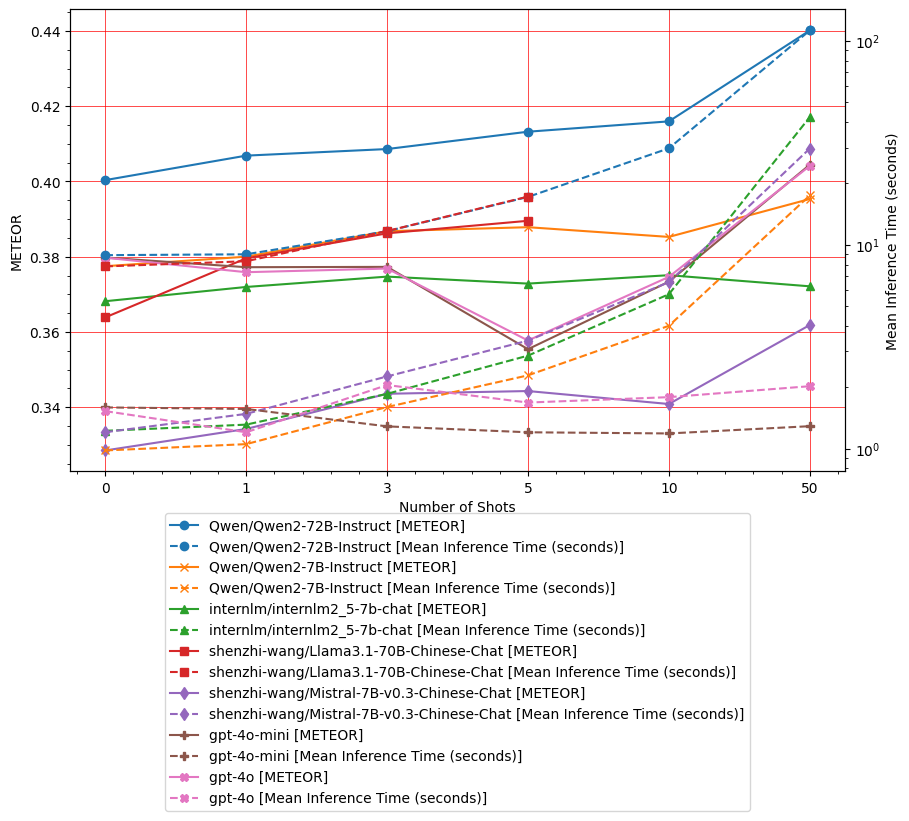

In [26]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
    [False, True]
)

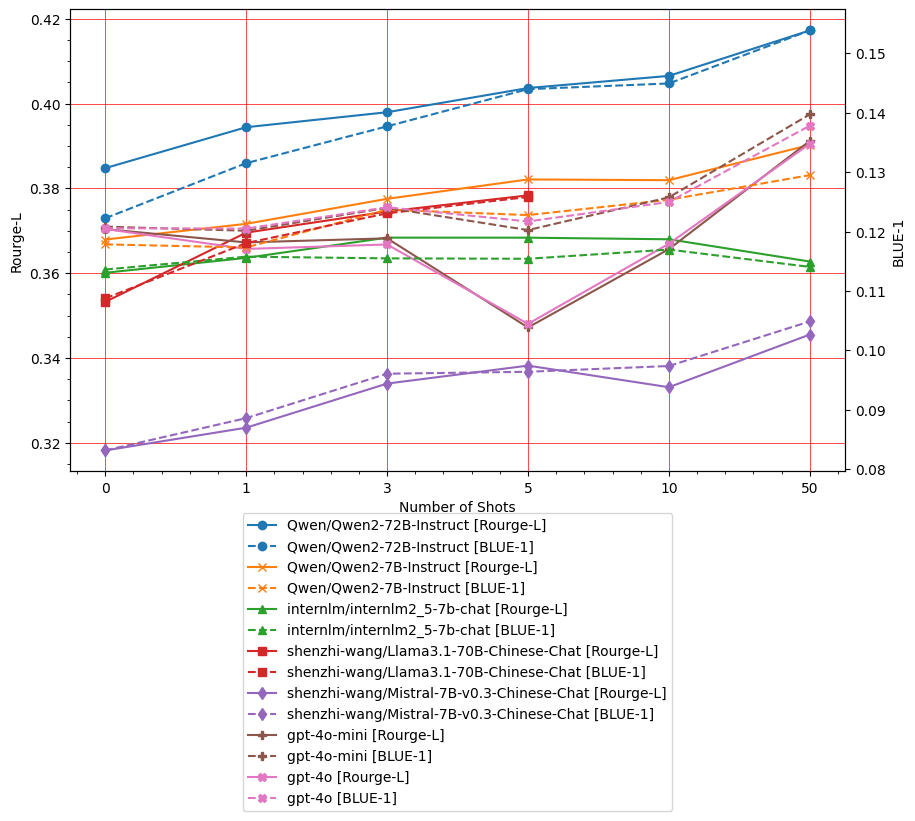

In [20]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

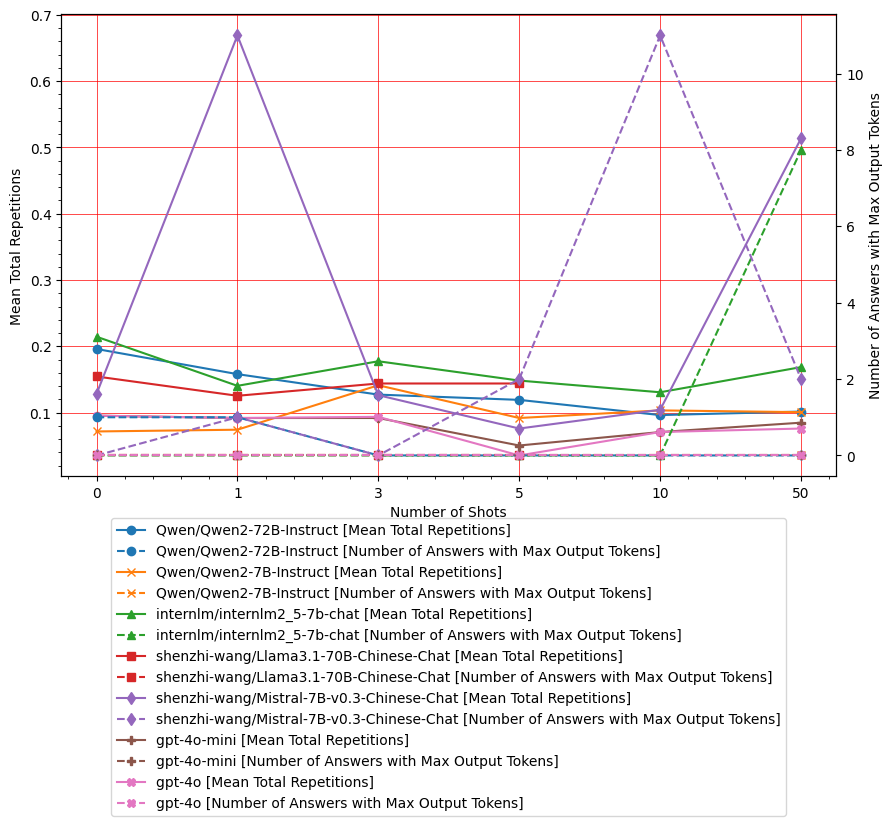

In [21]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "num_max_output_tokens"],
    ["Mean Total Repetitions", "Number of Answers with Max Output Tokens"],
)

In [22]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: Qwen/Qwen2-72B-Instruct/shots-00
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/shots-00

*** Found 1 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/shots-00
--------------------------------------------------
chinese: 话都说得有些不搭调，可也是借酒吐真言，放了平时则是难出口的。
--------------------------------------------------
english: Her words were inappropriate to the occasion; obviously, alcohol was bringing out some hidden truths.
--------------------------------------------------
Qwen/Qwen2-72B-Instruct/shots-00: Though his words were somewhat incoherent, he was speaking the truth by借助the aid of alcohol, which would be hard to utter under normal circumstances. 

Note: "借酒吐真言" is a Chinese idiom that means "to speak the truth with the aid of alcohol". However, since the instruction is not to provide additional sentences, I have included the translation of the idiom in brackets. If you prefer not to have this, the sentence would be: 

Though his words were s

In [23]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [24]:
metrics_df.describe()

shots     meteor     bleu_1    rouge_l  ews_score  repetition_score  \
count  40.00000  40.000000  40.000000  40.000000       40.0         40.000000   
mean   10.57500   0.378546   0.120110   0.368845        0.0          0.137290   
std    17.07583   0.023004   0.014576   0.021844        0.0          0.113673   
min     0.00000   0.328500   0.083138   0.318221        0.0          0.035305   
25%     1.00000   0.371011   0.115466   0.362087        0.0          0.091792   
50%     3.00000   0.377256   0.120685   0.368299        0.0          0.103707   
75%    10.00000   0.388274   0.125454   0.381972        0.0          0.143866   
max    50.00000   0.440154   0.153863   0.417224        0.0          0.669020   

       total_repetitions        rap  num_max_output_tokens   eval_time  
count          40.000000  40.000000              40.000000   40.000000  
mean            0.137290   0.376365               0.650000    9.490600  
std             0.113673   0.023388               2.142967   19.102780  
min             0.035305   0.325069               0.000000    0.980583  
25%             0.091792   0.368288               0.000000    1.439541  
50%             0.103707   0.375765               0.000000    2.157105  
75%             0.143866   0.386523               0.000000    8.917034  
max             0.669020   0.438232              11.000000  112.503972